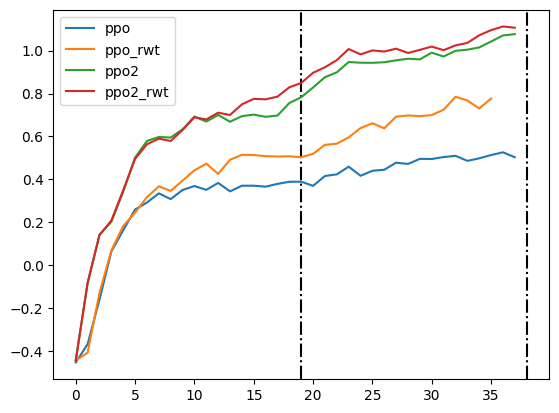

In [3]:
import time
import wandb
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

api = wandb.TrackingApi()

def get_training_rewards(run):
    pd.DataFrame(run.history())

project = "openrlhf_train_ppo"

algos = ["ppo", "ppo_rwt", "ppo2", "ppo2_rwt"]

data_id = {
    "ppo": [
        "run_20240712_962ab3ce", 
        "run_20240713_fe00e13e", 
        # "run_20240713_f9fab217",
    ],
    "ppo_rwt": [
        "run_20240713_f251c4ed", 
        "run_20240716_226992c4", 
        # "run_20240718_8cce3f60",
    ],
    "ppo2": [
        "run_20240719_a55da610", 
        "run_20240721_cfa74320", 
        # "run_20240723_29b483af",
    ],
    "ppo2_rwt": [
        "run_20240719_cb46e46d", 
        "run_20240722_7e53fa98", 
        # "run_20240724_103c89f9",
    ]
}

runs = {}

for algo in algos:
    runs[algo] = []
    for run_id in data_id[algo]:
        while True:
            result = api.run(project=project, run_id=run_id).scan_history()["train/reward"]
            if result:
                runs[algo].extend(result)
                break


In [ ]:
plt.axvline(x=19, color='black', linestyle='dashdot')
plt.axvline(x=38, color='black', linestyle='dashdot')
# plt.axvline(x=57, color='black', linestyle='dashdot')

for algo in algos:
    plt.plot(runs[algo], label=algo)
plt.legend()